# Morphogenesis: How does complexity arise from relatively simple agents?

#### Jonathan Zerez
#### SCI-1299  |  Fall, 2020


###### How to view this project:
If you'd like, you can simply look through a static version of the project on [this website](https://jzerez.github.io/swarms/). If that's what you wish, then keep reading! If however, you'd like to run an interactive version of the project that can run code live, click on this [link to Binder!](https://mybinder.org/v2/gh/jzerez/swarms/bio?filepath=Bio%20Project.ipynb). You'll be able to adjust parameters in Binder and see how they impact the patterns that form! Just be warned, it can take a little while to load, so be patient.

If you choose to run the project in Binder, you can run cells of code by clicking on them and pressing the `Shift` and `Enter` keys at the same time. That will run the selected cell. Note that most cells refer to code that was run in previous cells. As such, running any cell requires all previous cells to be run as well in order to avoid any errors. 

## Introduction
It is easy see the immense complexity of life on earth and wonder how it all came to be. Especially in multicellular organisms, the level of complexity is astounding, as individual subcomponents all must work together in perfect harmony in order to keep the organism alive. How can individual cells work together to form tissues, which form organs, which perform vital tasks for the organism? These individual cells have no knowledge of their role in the greater picture, and yet they are able to form these complex tissues and organs. This emergent behavior is called Morphogenesis.  From [Wikipedia](https://en.wikipedia.org/wiki/Morphogenesis), *''Morphogenesis is the biological process that causes a cell, tissue, or organism to develop its shape''*.

Some see the sheer complexity of life and conclude that it must arise from an Intelligent Creator: a powerful being wise enough to devise and implement organic systems that are both complex and robust. After all, if humans (with all their tools and ingenuity) are unable to fully grasp the intricacies of complex systems in multicellular life, how could these complex systems arise from the chaos of nature? Surely there must be higher powers at play, right?

It is not my place to disprove the existence of an Intelligent Creator. In fact, it is impossible to do so! The idea of an Intelligent Creator is one that is unfalsifiable: it is impossible to prove that an undetectable and unmeasurable Intelligent Creator either exists or does not exist. It is an idea that is based in faith and not scientific observation. Instead, I will strive to produce evidence/simulations that illustrate how the prevailing and accepted scientific theory of evolution does indeed account for and adequately explain the complexity in life that we see on earth today.

In particular, I will show how complexity can arise from very simple agents, specifically in morphogenesis and complex patterns in nature. I will demonstrate using python as a scientific tool, that simple agents following simple rules and only interacting on a local level are able to create robust and complex patterns similar to what we see in nature. Hopefully it will demonstrate how easily complexity can arise from the natural world.

## Diffusion
### A brief introduction
Diffusion is the natural tendency for substances of relatively high concentrations to slowly disapate and spread out to surrounding areas with relatively low concentrations. If you've ever made tea before, you've seen diffusion in action! When you place a tea bag in hot water, the tea leaves begin the steep, increasing the concentration of tea in the water closest to the tea bag. Over time, the high concentration of tea near the teabag will slowly start to spread further and further. Hypothetically, if you were to leave your teabag sitting in your tea for a very long time, it would eventually become uniformly strong. However, we both know that this would take a very long time, which is why we mix our tea by dunking our teabags up and down. 

This example about tea is indented to highlight two important features about diffusion. 
1. Because the tea diffuses on its own, we can see that **Diffusion is a natural process**. It does not take energy for diffusion to occur and will happen on its own
2. Because the tea would take an extremely long time to become evenly steeped without mixing, we can see that **Diffusion is a slow process**. The time for something to equilibrate from diffusion alone is quite long

In short, diffusion is the universe's way of smoothing everything out into an equilibrium state where everything is nice and uniform. 

Below is an implementation and visualization of diffusion in python. The implementation in the next two cells are not super important, so if you're not interested in it, feel free to scroll down to see the results of the visualization below! **If you are in Binder and want to be able to run the code in real time, make sure to run these cells (but don't edit them).**

In [1]:
# Importing dependencies
import time
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
from scipy.signal import correlate2d

# Set the defualt figure size
plt.rcParams['figure.figsize'] = [19, 7]

In [2]:
class Diffusion: 
    def __init__(self, grid_size, n_steps, rate=0.2):
        self.grid_size = grid_size
        self.n_steps = n_steps
        self.rate = rate
        self.kernel = np.array([[.05, .2, .05],
                                [ .2, -1, .2],
                                [.05, .2, .05]])
        self.init_grid()

    
    # Creates an animation of the grid
    def animate(self, grid, sleep_time=0.1, steps_per_frame=1):
        plt.figure()
        plt.imshow(grid)
        for step in range(self.n_steps):
            self.update(step)
            if step % steps_per_frame == 0:  
                plt.show()
                time.sleep(sleep_time)
                clear_output(wait=True)

    # Creates the initial high concentration spot of chemicals in the center of the grid
    def add_chemical(self, grid, radius = 20, amount = 1):
        c = self.grid_size[0]//2
        r = self.grid_size[0]//radius
        grid[c-r:c+r,c-r:c+r] += amount
        return grid
    
    # Initializes the grid with starting concentrations of chemicals
    def init_grid(self):
        self.grid = np.ones(self.grid_size)
        self.grid = self.add_chemical(self.grid)

    # Update the grid based on its current state
    def update(self, step, plot_on=True):
        self.grid += self.rate * correlate2d(self.grid, self.kernel, mode='same', boundary='wrap')
        if plot_on:
            plt.imshow(self.grid)
            title = str(step + 1) + ' timesteps'
            plt.title(title)
    
    # Creates a grid of subplots, each taken at `n_steps` intervals from each other
    def plot_n_timesteps(self, axs_shape, n_steps, grid):
        ax_rows = axs_shape[0]
        ax_cols = axs_shape[1]
        fig, axs = plt.subplots(ax_rows, ax_cols, figsize=(15,15))
        for i, ax in enumerate(axs.flat):
            ax.imshow(grid)
            for j in range(n_steps):
                self.update(i * n_steps + j, plot_on=False)
            title = 'Process after ' + str(i*n_steps) + ' timesteps'
            ax.set_title(title)
        plt.show()
    

For clarity's sake, I will continue using the tea example. Here, we're creating a two dimensional (flat) square teacup. We start off with a high concentration of tea in the very center (shown in yellow). The rest of the cup has a low concentration of tea (shown as dark purple). As we let the simulation go on, we can see that the tea slowly starts to spread out. This is diffusion in action!

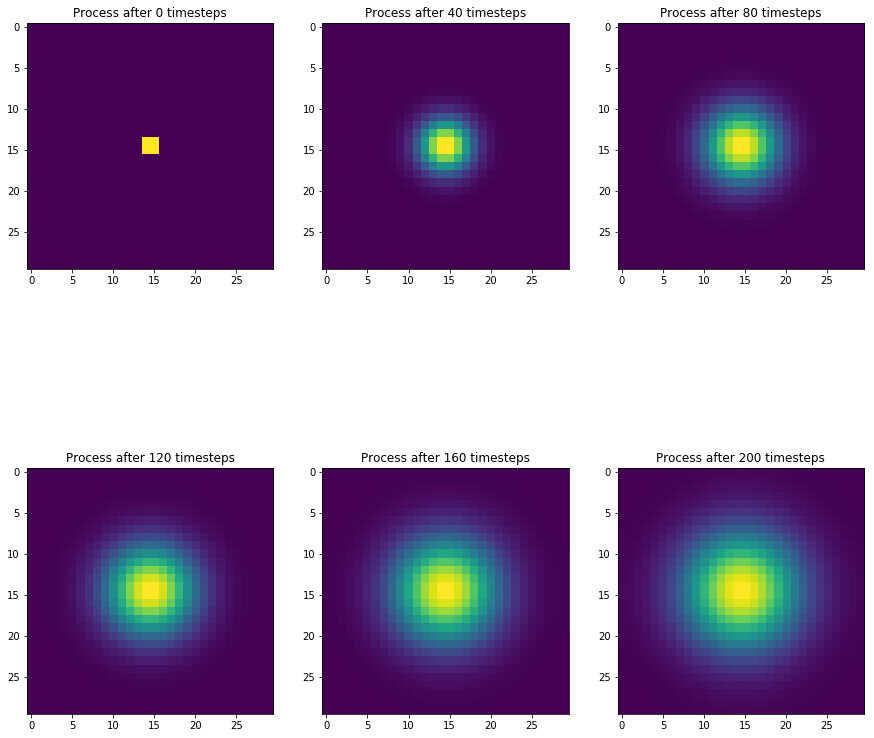

In [3]:
# Creates a Diffusion simulation object with a 30x30 grid
d = Diffusion((30,30), 100, rate=0.2)
# Creates a 2x3 grid of plots, each 40 timesteps apart
d.plot_n_timesteps((2,3), 40, d.grid)

The cell below is an animation of the diffusion simulation, try to run the cell to see the animation play!

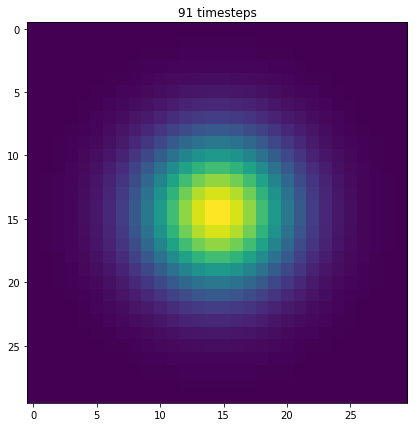

In [4]:
d = Diffusion((30,30), 100, rate=0.3)
# Animate the Diffusion simulation!
d.animate(d.grid, steps_per_frame=10)

### Last points about diffusion
This may be difficult to observe in the series of snapshots shown above, but you may notice that diffusion seems to happen a lot slower near the edges of the "tea circle". It turns out that the rate at which diffusion happens is proportional to something called the *divergence* of the chemical. This is a scary word, but essentially, *divergence* is a measure of whether a position's neighbors are collectively higher or collectively lower than it. 

At the beginning of the simulation, we would say that there is a lot of divergence at the center of the cup: all of the neighboring locations around the high concentration spot are collectively lower than the high concentration spot in the middle. This means that the tea starts diffusing quite quickly to begin with. Conversely, an area whose neighbors all have the same concentration as it would have zero divergence. 

## Reaction-Diffusion Systems
### Introduction
While it is certainly cool to see diffusion in action, what does it have to do with Morphogenesis? Well, I showed you about diffusion because it is an important part of Reaction-Diffusion Systems. Alan Turing first proposed that these systems could be what is responsible for complex, but distinct and somewhat regular patterns seen in nature, such as the spots on cheetahs or giraffes, the stripes on zebras, or the folding patterns of coral.

These systems may sound complex, but we're already familiar with the Diffusion part of them, so we're basically halfway there! 

This time, we will consider not one, but two chemicals. One is called chemical $A$, and the other is chemical $B$. Every spot in our medium will have some concentration of $A$ and some concentration of $B$. Both chemicals will follow rules for diffusion. Areas with high concentrations of $A$ will flow into areas with low concentrations of $A$, and areas with high concentrations of $B$ will flow into areas with low concentrations of $B$. 

What about the reaction part? We will say that $A$ reacts in form $B$. At any given spot in our medium, the amount of $A$ that is transformed into $B$ is given by $ab^2$, where $a$ and $b$ are the concentrations of $A$ and $B$ at the given spot. 

Finally, we have to consider one last thing. If we only included reaction and diffusion, then eventually we would be left with no $A$ in the medium! It would all be transformed into $B$! At that point, the reaction would stop. In order to keep the reaction going, we carefully add in $A$ at each location in the medium, and carefully remove $B$ at each location in the medium in order to keep balance and ensure that the reaction continues.

So that's it really! Reaction Diffusion Systems simply have two chemicals that are allowed to react with each other, diffuse through space, and as long as we manage the levels of the chemicals, we will soon see that these rules are enough for very interesting and complex patterns to arise! Each plot that you see below is the concentration of $A$ for a unique timestep.

In [5]:
class ReactionDiffusion(Diffusion):
    def __init__(self, grid_size, n_steps, rate=0.2, rd_params=(0.4, 0.2, 0.055, -0.117)):
        self.grid_size = grid_size
        self.n_steps = n_steps
        self.rate = rate
        self.kernel = np.array([[.05, .2, .05],
                                [ .2, -1, .2],
                                [.05, .2, .05]])
        self.init_grid()
        self.ca, self.cb, self.a_add_rate, self.b_add_rate = rd_params
        
    # Specify the initial concentrations of both chemicals in the grid
    def init_grid(self):
        self.a = np.ones(self.grid_size, dtype=np.float)
        self.b = np.random.random(self.grid_size) * 0.1
        self.b = self.add_chemical(self.b)
        
    # Update the grid based on its current state
    def update(self,step, plot_on=True):
        div_a = correlate2d(self.a, self.kernel, mode='same', boundary='wrap')
        div_b = correlate2d(self.b, self.kernel, mode='same', boundary='wrap')
        
        reaction = self.a * self.b**2
        self.a += div_a * self.ca - reaction + self.a_add_rate * (1-self.a)
        self.b += div_b * self.cb + reaction + self.b_add_rate * self.b
        if plot_on:
            plt.imshow(self.a)
            title = str(step + 1) + ' timesteps'
            plt.title(title)
    

In the simulation below, I tuned the constants of the reaction diffusion system in order to yield this cool ribbon shape. 

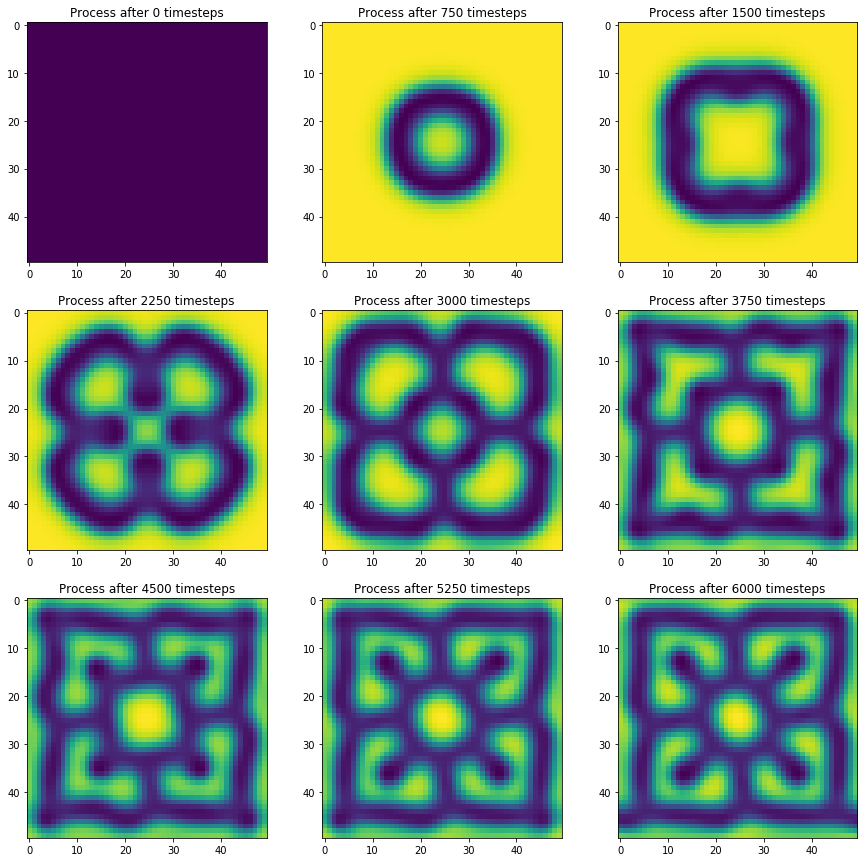

In [10]:
# Creates a reaction-diffusion simulation object with a grid size of (50x50)
rd = ReactionDiffusion((50,50), 6000)
# Creates a 3x3 grid of plots, each 750 timesteps apart
rd.plot_n_timesteps((3,3), 750, rd.a)

If we animate the function, we can see how the chemicals react and diffuse in the space and see how the patterns evolve in real time! Making a nice animation is rather computationally expensive, so I've gone ahead and saved one as a gif so that it can just play without requiring the computer to do a lot of work. Because the simulation starts with a random initial condition for the concentration of chemical $B$, the patterns that evolve are *slightly* different.  

![png](./bio_assets/squiggles.gif)

And in this simulation, I tuned the parameters of the Reaction Diffusion system to create spots. Interestingly, as the pattern evolves, it looks extremely similar to mitosis, which is when cells undergo replication. In mitosis, one cell will divide into two identical cells. It is the process by which organisms grow. In the animation you can see how the each new dot will also undergo "mitosis" after it is created.

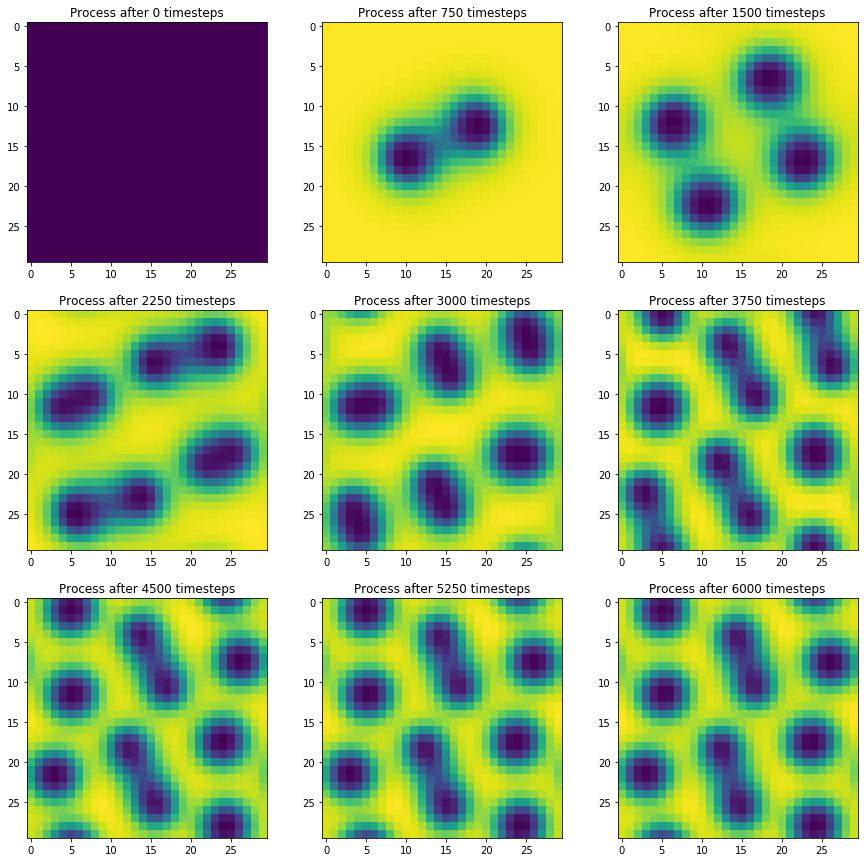

In [7]:
rd = ReactionDiffusion((30,30), 6000, rd_params=(0.4,0.2,0.039,-0.104))
rd.plot_n_timesteps((3,3), 750, rd.a)

Finally, here's an animation of the following pattern to see how similarly it resembles mitosis. **Beware! This cell takes a long time to run! If you don't really care about seeing the simulation create an animation in real time, I would not run the cell, especially because there is a gif of the pattern evolving already below**

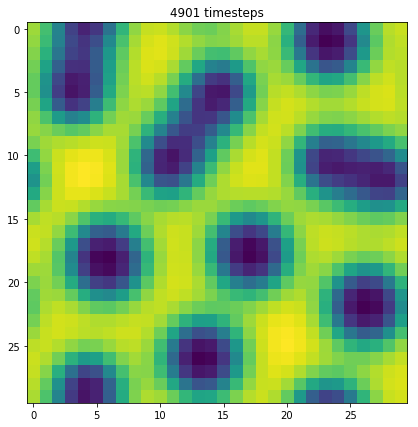

In [8]:
rd = ReactionDiffusion((30,30), 5000, rd_params=(0.4,0.2,0.039,-0.104))
rd.animate(rd.a, sleep_time=0, steps_per_frame=100)


Like before, I've taken the liberty to animate the function so that you can see the patterns evolve in real time without actually having to wait for the computer to run the code. Also like last time, because the initial concentrations of chemical **B** are random, the pattern and scaling is *slightly* different. See below!


![png](./bio_assets/dots1.gif)

Here is one last pattern that you can see: Stripes! If you are running the notebook on Binder, you can try to change the constants in `rd_params` to see if you can find any other interesting patterns! Beware, the constants are really sensitive to change, so it is best to make small incremental changes to see how the patterns change. I've found that the second two parameters in the tuple are best to change.

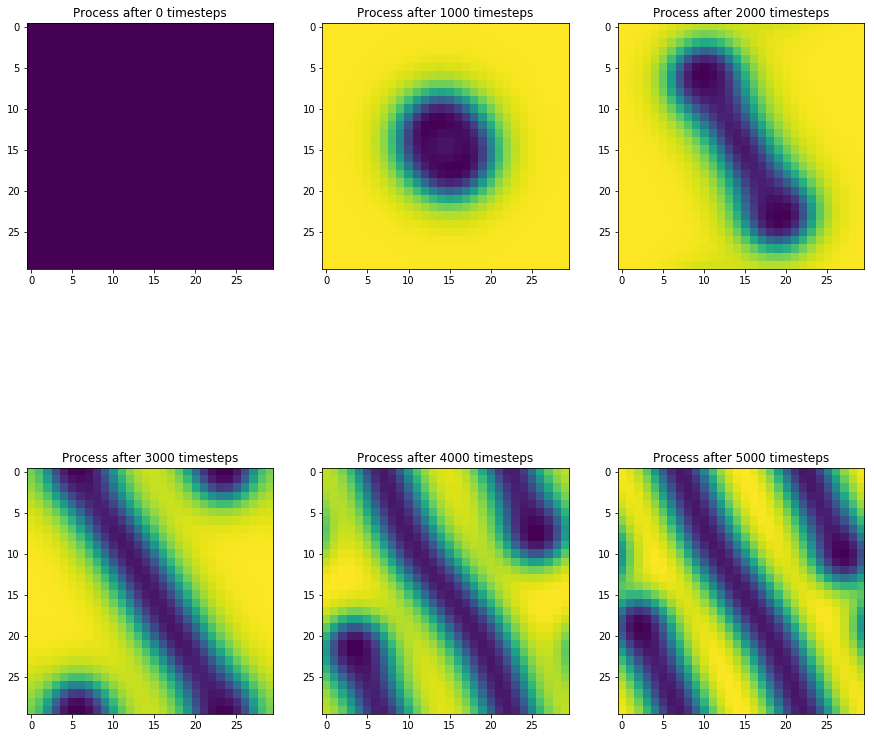

In [11]:
# Creates a reaction-diffusion simulation object with a grid size of (30x30). 
# Change the values inside rd_params to see what patterns you can make!
rd = ReactionDiffusion((30,30), 5000, rd_params=(0.6,0.3,0.06,-0.124))

# Plot a 2x3 grid of plots, each 1000 timesteps apart. 
rd.plot_n_timesteps((2,3), 1000, rd.a)

### Significance
Why are these patterns so important? Well, it goes back to the original issue of emergence and morphogenesis. Just like how individual cells are unaware of their role in larger structures such as tissues, each location in the reaction diffusion system is unaware of the larger general patern that it is a part of. Each location only has a concentration of $A$ and $B$, and follows very simple rules for how those concentrations change over time as a function of its neighbors' concentrations. Despite these simple rules, they are able to form these really complex patterns. What's more, is that the patterns that they form are relatively robust. Even with a degree of random noise that is inserted at the beginning of the simulation, the patterns that are formed are robust and consistent over multiple runs. 

## Conclusions
In this noteobook, I set out to show that complex structures can arise natrually as a result of very simple rules and local interactions. While the degree of complexity captured by these simulations is still very small compared to what is exhibited in multicellular life, it is my hope that they still illustrate the point. These simulations are mathematically driven. Their initial and final conditions can be directly observed or measured, and they clearly demonstrate the emergence of complex behavior. It is my hope that for those who may subscribe to the notion of Intelligent Design, that these simulations may offer a potential alternative explanation to the complexity we see in life: An explanation that is backed by mathematics and easy to understand visuals. 